### 乱数の生成
ここでは、$[0,1]$の一様分布に従う一様乱数$U$は何らかの方法により得られるとする。

#### 逆変換法
逆変換法は、一様乱数を適切に変換することで望みの確率分布に従う乱数を生成する方法である。
以下の確率分布の性質を用いる。

- 確率変数$x$が確率密度関数$p(x)$に従うとき、その累積分布関数$F(x)=\int_{-\infty}^xp(s)ds$を用いて得られる確率変数$y=F(x)$は$[0,1]$上の一様分布に従う
- その逆も成り立つ。つまり確率変数$y$が$[0,1]$上の一様分布に従うとき、$F$の逆変換$F^{-1}$を用いて得られる確率変数$x=F^{-1}(y)$は確率密度関数$p(x)$に従う

以下の乱数生成のアルゴリズムが得られる。

(アルゴリズム1)確率密度関数$p(x)$に従う乱数の生成(逆変換法)
1. 一様乱数$U$を生成する
2. $p(x)$の累積分布関数の逆関数$F^{-1}$を用いて、$x=F^{-1}(U)$を返す

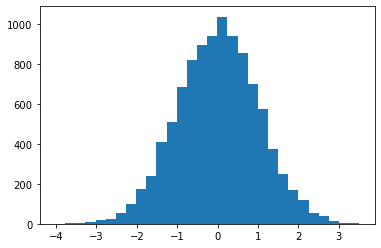

In [27]:
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt

U = uniform.rvs(size=10000)
x = norm.ppf(U)

plt.hist(x, bins=30);

#### 棄却法
望みの確率密度関数$p(x)$から乱数を直接生成するのが難しいときによく用いられる。
棄却法は、まず乱数の生成が可能な別の確率密度関数$p^*(x)$(提案分布)から乱数$x^*$を生成し、それを$p(x)$の乱数の候補としてみなし、その候補を$x^*$の値に応じた採択確率$r(x^*)$で採択する方法である。
ここで、採択確率$r(x)$を、定義域で$p(x)\leq \alpha p^*(x)$を満たす$\alpha$に対して、$r(x)=p(x)/\alpha p^*(x)$とすれば、採択された候補は$p(x)$に従う。
ある候補を確率$r$で採択するには、一様乱数$U$を生成し、$U\leq r$ならば候補を採択し、そうでなければ候補を棄却すればよい。

(アルゴリズム2)確率密度関数$p(x)$に従う乱数の生成(棄却法)
1. 提案分布$p^*(x)$および、定義域全体で$p(x)\leq \alpha p^*(x)$を満たす最小の$\alpha$を決める
2. 以下を繰り返す
　2.1. 提案分布$p^*(x)$に従う乱数$x^*$(候補)を生成する
　2.2. 一様乱数$U$と採択確率$r←p(x^*)/\alpha p^*(x^*)$に対して、もし$U\leq r$ならば候補を採択しステップ3に進み、そうでなければ候補を棄却しステップ2.1に戻る
3. 採択された候補$x^*$を返す

In [155]:
from scipy.stats import t as t_dist
import numpy as np

x = np.arange(-3, 3, 0.1)
alpha = np.max(norm.pdf(x)/t_dist.pdf(x, df=10))

def kikyaku(n):
    result = []
    while(len(result)<n):
        xx = norm.rvs(size=1)
        U = uniform.rvs(size=1)
        r = norm.pdf(xx) / (alpha*t_dist.pdf(xx, df=10))

        if U <= r:
            result.append(xx[0])
    return np.array(result)

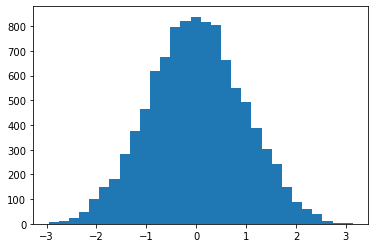

In [156]:
plt.hist(kikyaku(10000), bins=30);